In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
bornes = pd.read_csv("./data/bornes_1.csv", index_col = 0)
bornes.head()

,id_station_itinerance,nom_station,implantation_station,coordonneesXY,nbre_pdc,condition_acces,reservation,horaires,accessibilite_pmr,restriction_gabarit,station_deux_roues,date_mise_en_service,consolidated_commune
0,FRELCPVITHK,Vitrolles - Hôtel Kyriad Aéroport,Station dédiée à la recharge rapide,"[5.25193300,43.42547400]",4,Accès libre,true,24/7,Accessibilité inconnue,Inconnu,false,2022-12-15,Vitrolles
1,FRELCPBSGPC,Bussy Saint Georges - Hôtel Première Classe,Station dédiée à la recharge rapide,"[2.70466000,48.83257000]",4,Accès libre,true,24/7,Accessibilité inconnue,Inconnu,false,2023-01-06,Bussy-Saint-Georges
2,FRELCPBORBL,Bordeaux - Novotel Bordeaux Lac,Station dédiée à la recharge rapide,"[-0.56711100,44.89088900]",8,Accès libre,true,24/7,Accessibilité inconnue,Inconnu,false,2022-06-22,Bordeaux
3,FRELCPVITHK,Vitrolles - Hôtel Kyriad Aéroport,Station dédiée à la recharge rapide,"[5.25193300,43.42547400]",4,Accès libre,true,24/7,Accessibilité inconnue,Inconnu,false,2022-12-15,Vitrolles
4,FRELCPVITHK,Vitrolles - Hôtel Kyriad Aéroport,Station dédiée à la recharge rapide,"[5.25193300,43.42547400]",4,Accès libre,true,24/7,Accessibilité inconnue,Inconnu,false,2022-12-15,Vitrolles


In [3]:
bornes.date_mise_en_service.value_counts()

2021-03-29    1518
2019-11-26     584
2021-01-01     400
2021-07-12     394
2022-10-07     335
              ... 
2019-06-14       1
2018-08-27       1
2020-05-31       1
2015-06-02       1
2021-03-05       1
Name: date_mise_en_service, Length: 2130, dtype: int64

In [4]:
bornes['date'] = pd.to_datetime(bornes.date_mise_en_service)
bornes.drop("date_mise_en_service", axis = 1, inplace = True)

In [5]:
nb_bornes = bornes[["nbre_pdc", "date"]]
nb_bornes = nb_bornes.groupby("date").count()
nb_bornes.columns = ["nbre_bornes"]
nb_bornes

,nbre_bornes
date,
1970-01-01,5
1976-06-15,1
1999-12-31,7
2000-01-01,222
2002-10-04,1
...,...
2023-01-06,4
2023-01-08,6
2023-01-09,4


In [6]:
nb_pdc = bornes[["nbre_pdc", "date"]]
nb_pdc = nb_pdc.groupby("date").sum()
nb_pdc

,nbre_pdc
date,
1970-01-01,24
1976-06-15,5
1999-12-31,28
2000-01-01,2003
2002-10-04,8
...,...
2023-01-06,16
2023-01-08,18
2023-01-09,8


In [7]:
# Avoir le nombre de pts de charge et de borne par année :
nb = nb_pdc.join(nb_bornes)
nb = nb.resample("Y").sum()
nb["total_pdc"] = nb["nbre_pdc"].cumsum()
nb["total_bornes"] = nb["nbre_bornes"].cumsum()
# Réorganisation des colonnes
nb = nb.iloc[: , [0, 2, 1, 3]]
nb

,nbre_pdc,total_pdc,nbre_bornes,total_bornes
date,,,,
1970-12-31,24,24,5,5
1971-12-31,0,24,0,5
1972-12-31,0,24,0,5
1973-12-31,0,24,0,5
1974-12-31,0,24,0,5
1975-12-31,0,24,0,5
1976-12-31,5,29,1,6
1977-12-31,0,29,0,6
1978-12-31,0,29,0,6


In [8]:
fig = go.Figure()
fig.add_trace(go.Line(name = "Points de charge", x = nb.index.year, y = nb["total_pdc"]))
fig.add_trace(go.Line(name = "Nombre de bornes", x = nb.index.year, y = nb["total_bornes"]))
fig.update_layout(title = "Evolution de la capacité de charge sur l'ensemble du territoire (1970 à 2023)")
fig.show()

/home/roman.rutka@Digital-Grenoble.local/anaconda3/envs/env_dataforgood/lib/python3.11/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [9]:
# Seulement depuis 2010 :

fig = go.Figure()
fig.add_trace(go.Line(name = "Points de charge", x = nb.index.year[40:], y = nb.loc["2010" :, "total_pdc"]))
fig.add_trace(go.Line(name = "Nombre de bornes", x = nb.index.year[40:], y = nb.loc["2010" :, "total_bornes"]))
fig.update_layout(title = "Evolution de la capacité de charge sur l'ensemble du territoire (2010 à 2023)")
fig.show()

# Work on locations

In [10]:
bornes.consolidated_commune

0                  Vitrolles
1        Bussy-Saint-Georges
2                   Bordeaux
3                  Vitrolles
4                  Vitrolles
                ...         
55248              Ennevelin
55249                 Pessac
55250                 Pessac
55251                 Pessac
55252                 Pessac
Name: consolidated_commune, Length: 36555, dtype: object

## Extraction du département

In [11]:
import geopandas as gpd
import geoplot
import geoplot.crs as gcrs

In [12]:
deps = gpd.read_file("./data/france_geojson/departements-version-simplifiee.geojson")

In [13]:
deps.head()

,code,nom,geometry
0,01,Ain,"POLYGON ((4.78021 46.17668, 4.79458 46.21832, ..."
1,02,Aisne,"POLYGON ((4.04797 49.40564, 4.03991 49.39740, ..."
2,03,Allier,"POLYGON ((3.03207 46.79491, 3.04907 46.75808, ..."
3,04,Alpes-de-Haute-Provence,"POLYGON ((5.67604 44.19143, 5.69209 44.18648, ..."
4,05,Hautes-Alpes,"POLYGON ((6.26057 45.12685, 6.29922 45.10855, ..."


In [14]:
coms = gpd.read_file('./data/france_geojson/communes.geojson')
coms.head()

,code,nom,geometry
0,03252,Saint-Pont,"POLYGON ((3.26205 46.16463, 3.26390 46.16695, ..."
1,05039,Aubessagne,"POLYGON ((6.03282 44.71293, 6.03339 44.71395, ..."
2,16203,Mainzac,"POLYGON ((0.46574 45.53962, 0.46431 45.54032, ..."
3,16372,Souffrignac,"POLYGON ((0.49858 45.56477, 0.49624 45.56569, ..."
4,24002,Agonac,"POLYGON ((0.68751 45.30032, 0.69055 45.30082, ..."


In [15]:
communes = bornes.consolidated_commune.values
communes

array(['Vitrolles', 'Bussy-Saint-Georges', 'Bordeaux', ..., 'Pessac',
       'Pessac', 'Pessac'], dtype=object)

In [16]:
# lister les départements correspondant à chaque ligne du dataframe
departements = []
for ville in communes :
    # Les particules ne sont pas prises en comptes dans coms
    ville = ville.replace("Le ", '').replace("La ", "").replace("Les ", "").replace("L'", "")
    if ville in coms.nom.values :
        target = coms.code[coms.nom == ville].values[0]
        departements.append(target[:2])
    else :
        departements.append("MISSING")

In [17]:
"MISSING" in departements

True

In [18]:
bornes['departement'] = departements

In [19]:
len(bornes), len(bornes[bornes.departement == "MISSING"])

(36555, 299)

299 lignes sans département sur 36555... close enough !

In [20]:
bornes = bornes.loc[:,["coordonneesXY", 'nbre_pdc', 'date', 'departement']]

In [21]:
bornes.head()

,coordonneesXY,nbre_pdc,date,departement
0,"[5.25193300,43.42547400]",4,2022-12-15,05
1,"[2.70466000,48.83257000]",4,2023-01-06,77
2,"[-0.56711100,44.89088900]",8,2022-06-22,33
3,"[5.25193300,43.42547400]",4,2022-12-15,05
4,"[5.25193300,43.42547400]",4,2022-12-15,05


# Combien de bornes par départements ?

In [22]:
deps = gpd.read_file("./data/france_geojson/departements-version-simplifiee.geojson")
deps.head()

,code,nom,geometry
0,01,Ain,"POLYGON ((4.78021 46.17668, 4.79458 46.21832, ..."
1,02,Aisne,"POLYGON ((4.04797 49.40564, 4.03991 49.39740, ..."
2,03,Allier,"POLYGON ((3.03207 46.79491, 3.04907 46.75808, ..."
3,04,Alpes-de-Haute-Provence,"POLYGON ((5.67604 44.19143, 5.69209 44.18648, ..."
4,05,Hautes-Alpes,"POLYGON ((6.26057 45.12685, 6.29922 45.10855, ..."


In [23]:
bornes_geo = deps.copy()

nb_bornes = bornes.groupby("departement").count()
nb_pdc = bornes.groupby("departement").sum()

nb_bornes = nb_bornes.iloc[:,0]

bornes_geo["nb_bornes"] = nb_bornes.values[:-1]
bornes_geo["nb_pdc"] = nb_pdc.values[:-1]

bornes_geo.head()


/tmp/ipykernel_167741/3950764472.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,code,nom,geometry,nb_bornes,nb_pdc
0,01,Ain,"POLYGON ((4.78021 46.17668, 4.79458 46.21832, ...",121,748
1,02,Aisne,"POLYGON ((4.04797 49.40564, 4.03991 49.39740, ...",187,1080
2,03,Allier,"POLYGON ((3.03207 46.79491, 3.04907 46.75808, ...",59,259
3,04,Alpes-de-Haute-Provence,"POLYGON ((5.67604 44.19143, 5.69209 44.18648, ...",145,1081
4,05,Hautes-Alpes,"POLYGON ((6.26057 45.12685, 6.29922 45.10855, ...",67,263


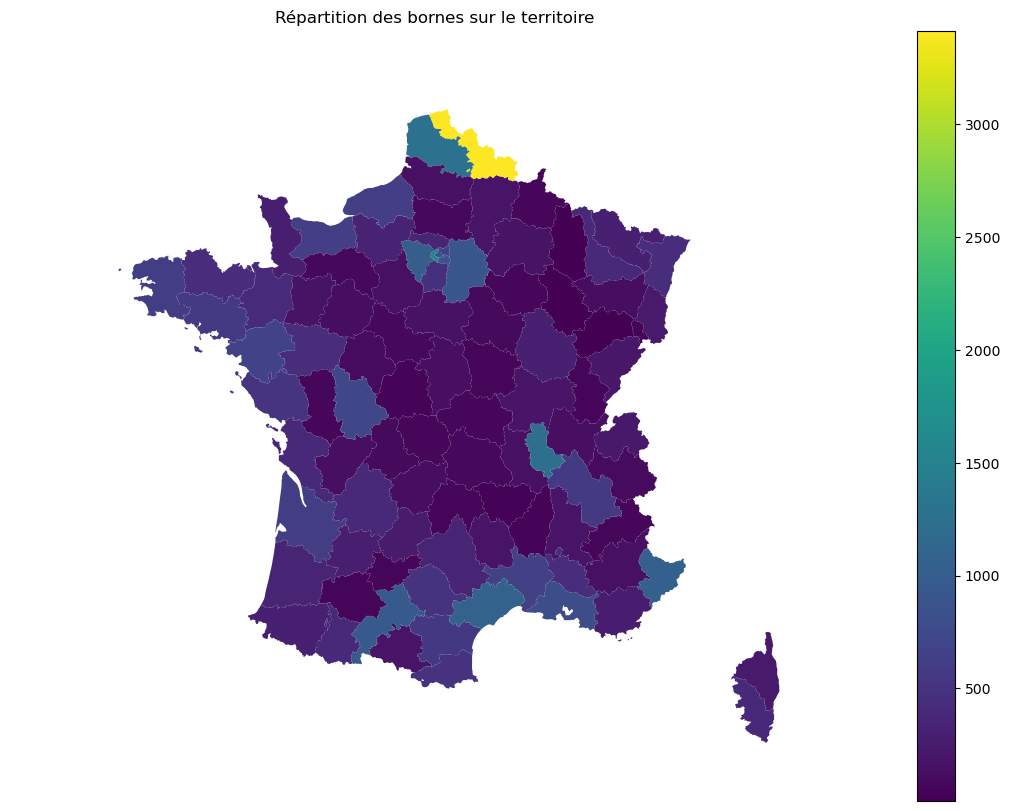

In [24]:
import geopandas as gpd
import geoplot
import geoplot.crs as gcrs

# bornes_map = geoplot.polyplot(deps, projection = gcrs.AlbersEqualArea(), hue = "nb_bornes", legend = True, edgecolor='darkgrey', facecolor='lightgrey', linewidth=.3,
    # figsize=(15, 10))

bornes_map = geoplot.choropleth(bornes_geo, hue = "nb_bornes", legend= True, projection=gcrs.AlbersEqualArea(), figsize=(15, 10), legend_kwargs={'spacing' : 'proportional'})
plt.title("Répartition des bornes sur le territoire")
plt.show()

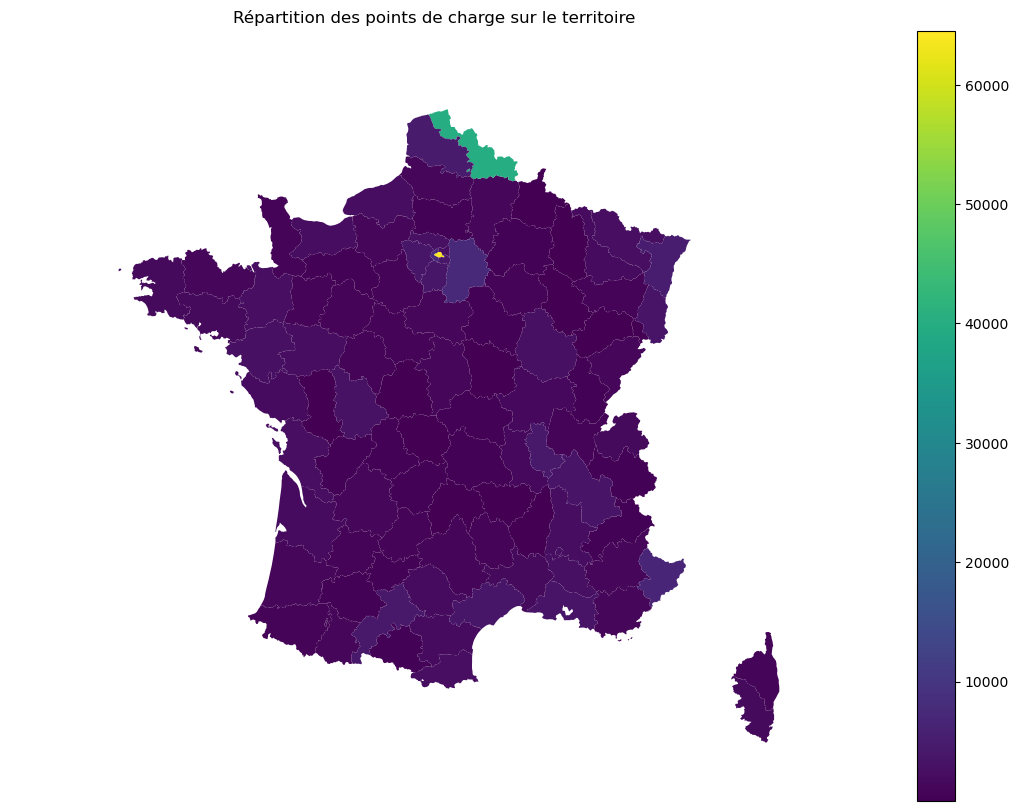

In [25]:
pdc_map = geoplot.choropleth(bornes_geo, hue = "nb_pdc", legend= True, projection=gcrs.AlbersEqualArea(), figsize=(15, 10), legend_kwargs={'spacing' : 'proportional'})
plt.title("Répartition des points de charge sur le territoire")
plt.show()

## Et si on prend que les bornes mises en service depuis 2010 ?

In [26]:
bornes.reset_index(inplace= True, drop=True)

In [27]:
bornes_2010 = pd.DataFrame(columns = bornes.columns)
for row in range(len(bornes)) :
    if bornes.date[row].year >= 2010 :
        bornes_2010.loc[row, :] = bornes.loc[row, :]
bornes_2010

,coordonneesXY,nbre_pdc,date,departement
0,"[5.25193300,43.42547400]",4,2022-12-15 00:00:00,05
1,"[2.70466000,48.83257000]",4,2023-01-06 00:00:00,77
2,"[-0.56711100,44.89088900]",8,2022-06-22 00:00:00,33
3,"[5.25193300,43.42547400]",4,2022-12-15 00:00:00,05
4,"[5.25193300,43.42547400]",4,2022-12-15 00:00:00,05
...,...,...,...,...
36550,"[3.105857, 50.5314804]",2,2021-06-07 00:00:00,59
36551,"[-0.6453929999999919, 44.787885]",4,2021-08-11 00:00:00,33
36552,"[-0.6453929999999919, 44.787885]",4,2021-08-11 00:00:00,33
36553,"[-0.6453929999999919, 44.787885]",4,2021-08-11 00:00:00,33


In [28]:
bornes_2010_geo = deps.copy()

nb_bornes_2010 = bornes_2010.groupby("departement").count()
nb_pdc_2010 = bornes_2010.groupby("departement").sum()

nb_bornes_2010 = nb_bornes_2010.iloc[:,0]

bornes_2010_geo["nb_bornes"] = nb_bornes_2010.values[:-1]
bornes_2010_geo["nb_pdc"] = nb_pdc_2010.nbre_pdc.values[:-1]

bornes_2010_geo.head()

/tmp/ipykernel_167741/3430080819.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,code,nom,geometry,nb_bornes,nb_pdc
0,01,Ain,"POLYGON ((4.78021 46.17668, 4.79458 46.21832, ...",120,740
1,02,Aisne,"POLYGON ((4.04797 49.40564, 4.03991 49.39740, ...",183,1056
2,03,Allier,"POLYGON ((3.03207 46.79491, 3.04907 46.75808, ...",58,257
3,04,Alpes-de-Haute-Provence,"POLYGON ((5.67604 44.19143, 5.69209 44.18648, ...",145,1081
4,05,Hautes-Alpes,"POLYGON ((6.26057 45.12685, 6.29922 45.10855, ...",67,263


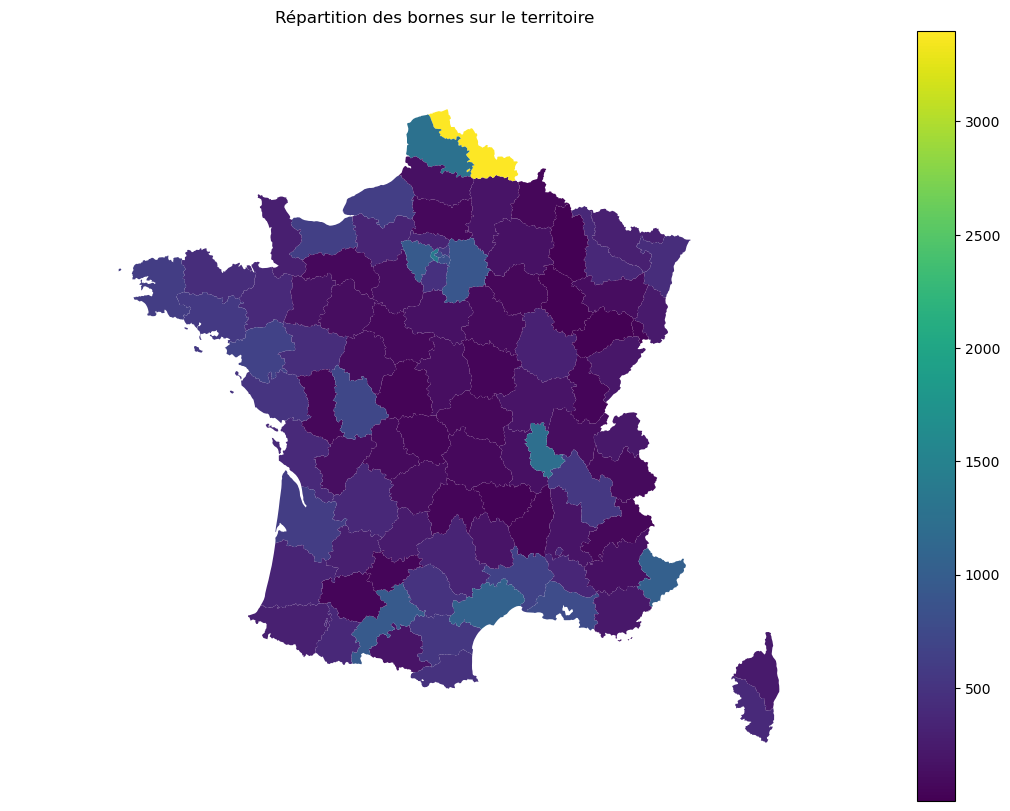

In [29]:
bornes_2010_map = geoplot.choropleth(bornes_2010_geo, hue = "nb_bornes", legend= True, projection=gcrs.AlbersEqualArea(), figsize=(15, 10), legend_kwargs={'spacing' : 'proportional'})
plt.title("Répartition des bornes sur le territoire")
plt.show()

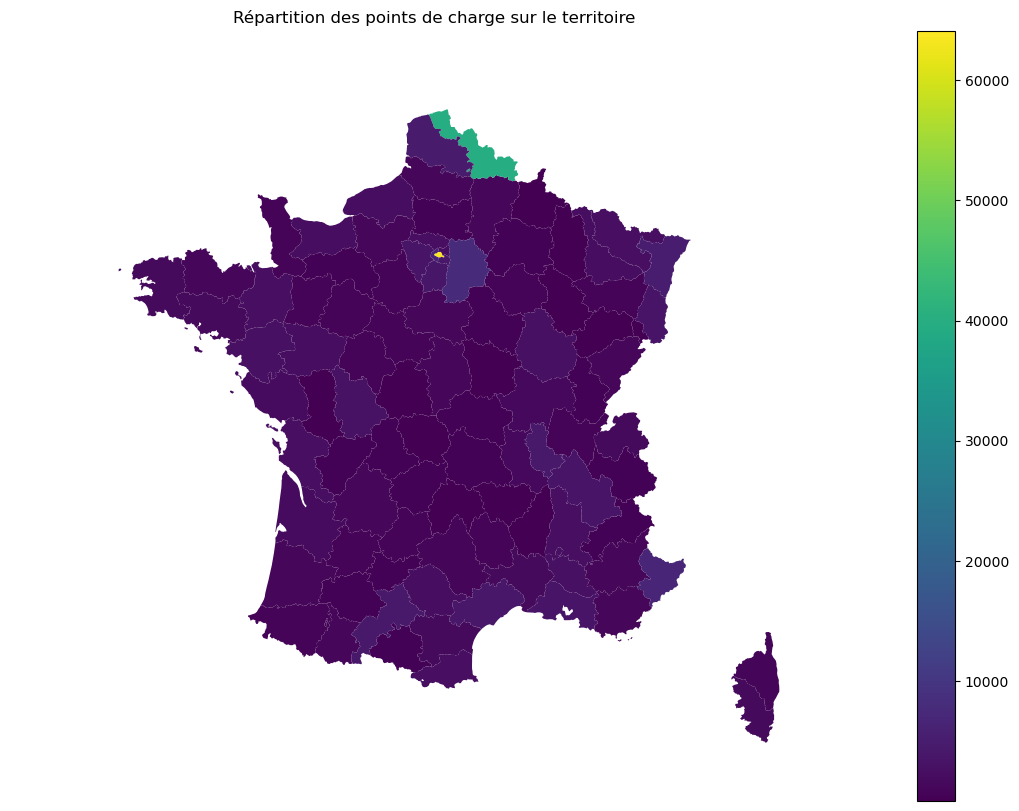

In [30]:
pdc_2010_map = geoplot.choropleth(bornes_2010_geo, hue = "nb_pdc", legend= True, projection=gcrs.AlbersEqualArea(), figsize=(15, 10), legend_kwargs={'spacing' : 'proportional'})
plt.title("Répartition des points de charge sur le territoire")
plt.show()

# Véhicules

In [31]:
ev = pd.read_csv('./data/voitures-commune-energie.csv', index_col = 0)
ev.head()

,codgeo,libgeo,epci,libepci,date_arrete,nb_vp_rechargeables_el,nb_vp_rechargeables_gaz,nb_vp,commune_geom,commune_centroid
0,95392,MÉRIEL,249500455,CC de la Vallée de l'Oise et des Trois Forêts,2020-12-31,20,0,4830,"{""coordinates"": [[[[2.2358530525, 49.087554388...","49.0770945834,2.2134117127"
1,31234,LE GRÈS,200071314,CC des Hauts Tolosans,2020-12-31,5,0,441,"{""coordinates"": [[[[1.097406777, 43.7001720575...","43.7192745425,1.0996680853"
2,31236,HERRAN,200073146,CC Cagire Garonne Salat,2020-12-31,0,0,97,"{""coordinates"": [[[[0.912074753, 42.9591788311...","42.9718236961,0.8860376525"
3,59046,BAMBECQUE,200040954,CC des Hauts de Flandre,2020-12-31,1,0,877,"{""coordinates"": [[[[2.5196459531, 50.904506729...","50.9089811369,2.5605647439"
4,31238,HUOS,200072635,CC Pyrénées Haut Garonnaises,2020-12-31,0,0,571,"{""coordinates"": [[[[0.6037135526, 43.052809196...","43.0692804906,0.5997857028"


In [32]:
ev['departement'] = [code[:2] for code in ev.codgeo]
ev["date"] = pd.to_datetime(ev.date_arrete)
ev = ev[["nb_vp_rechargeables_el","nb_vp", "departement", "date"]]
ev.columns = ["nb_ev", "nb_total", "departement", "date"]
ev.head()

,nb_ev,nb_total,departement,date
0,20,4830,95,2020-12-31
1,5,441,31,2020-12-31
2,0,97,31,2020-12-31
3,1,877,59,2020-12-31
4,0,571,31,2020-12-31


In [33]:
ev_an = ev[["nb_ev", "nb_total", "date"]]
ev_an = ev_an.groupby("date").sum()
ev_an = ev_an.resample("Y").sum()
ev_an

,nb_ev,nb_total
date,,
2020-12-31,414963,66393773
2021-12-31,2396759,268665075
2022-12-31,2648556,203674701


In [34]:
ev_an["cumsum"] = ev_an.nb_ev.cumsum()
ev_an

,nb_ev,nb_total,cumsum
date,,,
2020-12-31,414963,66393773,414963
2021-12-31,2396759,268665075,2811722
2022-12-31,2648556,203674701,5460278


In [35]:
# Seulement depuis 2020 :

fig = go.Figure()
fig.add_trace(go.Bar(name = "(Nombre de VE)/10", x = ev_an.index.year, y = ev_an["cumsum"]/10))
fig.add_trace(go.Bar(name = "Points de charge", x = nb.index.year[50:], y = nb.loc["2020" : "2022", "total_pdc"]))
fig.add_trace(go.Bar(name = "Nombre de bornes", x = nb.index.year[50:], y = nb.loc["2020" : "2022", "total_bornes"]))
fig.update_layout(title = "Parc automobile électrique et capacité de charge sur l'ensemble du territoire (2020 à 2022)")
fig.show()

## Répartition sur le territoire

In [36]:
# reprendre au format de bornes_2010_geo
bornes_2010_geo.head()

,code,nom,geometry,nb_bornes,nb_pdc
0,01,Ain,"POLYGON ((4.78021 46.17668, 4.79458 46.21832, ...",120,740
1,02,Aisne,"POLYGON ((4.04797 49.40564, 4.03991 49.39740, ...",183,1056
2,03,Allier,"POLYGON ((3.03207 46.79491, 3.04907 46.75808, ...",58,257
3,04,Alpes-de-Haute-Provence,"POLYGON ((5.67604 44.19143, 5.69209 44.18648, ...",145,1081
4,05,Hautes-Alpes,"POLYGON ((6.26057 45.12685, 6.29922 45.10855, ...",67,263


In [37]:
tmp = ev.iloc[:,:-1]
tmp = tmp.groupby("departement").sum()
data = bornes_2010_geo
data["nb_ev"] = tmp.nb_ev[:-1].values
data['nb_total'] = tmp.nb_ev[:-1].values
data

,code,nom,geometry,nb_bornes,nb_pdc,nb_ev,nb_total
0,01,Ain,"POLYGON ((4.78021 46.17668, 4.79458 46.21832, ...",120,740,58239,58239
1,02,Aisne,"POLYGON ((4.04797 49.40564, 4.03991 49.39740, ...",183,1056,37787,37787
2,03,Allier,"POLYGON ((3.03207 46.79491, 3.04907 46.75808, ...",58,257,17997,17997
3,04,Alpes-de-Haute-Provence,"POLYGON ((5.67604 44.19143, 5.69209 44.18648, ...",145,1081,12992,12992
4,05,Hautes-Alpes,"POLYGON ((6.26057 45.12685, 6.29922 45.10855, ...",67,263,10316,10316
...,...,...,...,...,...,...,...
91,91,Essonne,"POLYGON ((2.22656 48.77610, 2.23298 48.76620, ...",468,3701,114721,114721
92,92,Hauts-de-Seine,"POLYGON ((2.29097 48.95097, 2.32697 48.94536, ...",1392,6365,274891,274891
93,93,Seine-Saint-Denis,"POLYGON ((2.55306 49.00982, 2.58031 48.99159, ...",541,2169,88965,88965
94,94,Val-de-Marne,"POLYGON ((2.33190 48.81701, 2.36395 48.81632, ...",822,3765,90072,90072


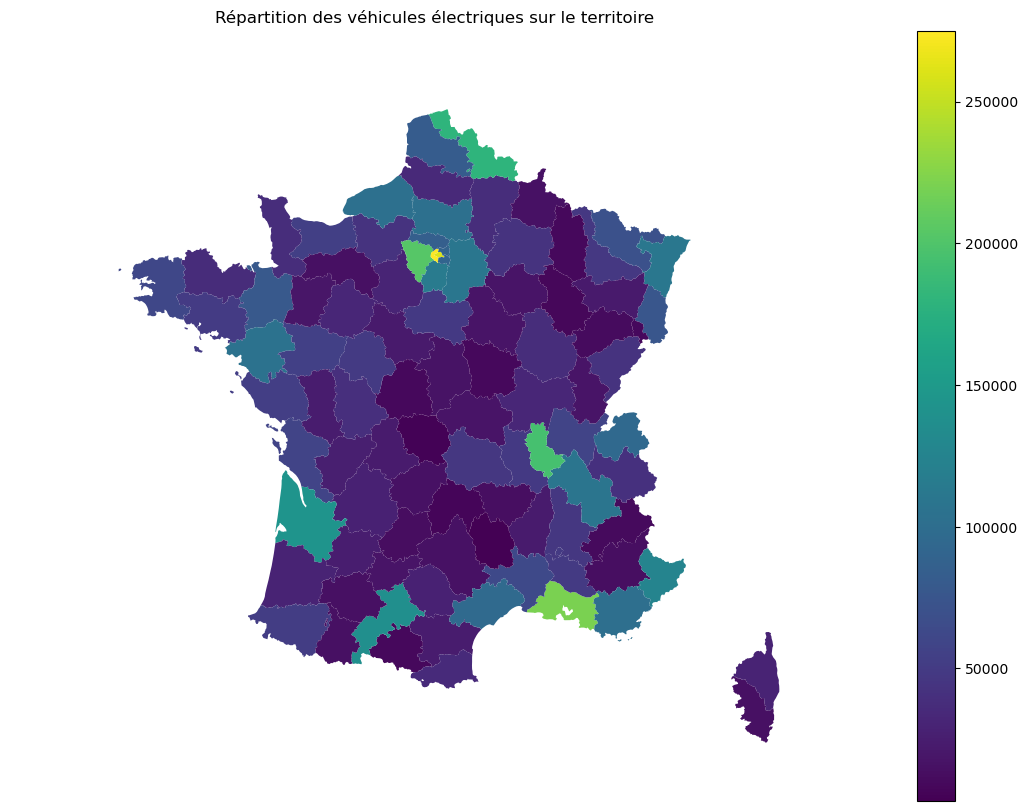

In [38]:
ev_map = geoplot.choropleth(data, hue = "nb_ev", legend= True, projection=gcrs.AlbersEqualArea(), figsize=(15, 10), legend_kwargs={'spacing' : 'proportional'})
plt.title("Répartition des véhicules électriques sur le territoire")
plt.show()

## Ratio nb_ev/nb_bornes et nb_ev/nb_pdc

***objectif*** : 1 borne (ou 1 pdc ?) pour 10 voitures électriques.  
**-->** ratio = nb_bornes / (nb_ev/10) ==> si ratio < 1 : pas assez de bornes

In [39]:
data['ratio_ev/bornes'] = data.nb_bornes/(data.nb_ev/10)
data['ratio_ev/pdc'] = data.nb_pdc/(data.nb_ev/10)
data

,code,nom,geometry,nb_bornes,nb_pdc,nb_ev,nb_total,ratio_ev/bornes,ratio_ev/pdc
0,01,Ain,"POLYGON ((4.78021 46.17668, 4.79458 46.21832, ...",120,740,58239,58239,0.020605,0.127063
1,02,Aisne,"POLYGON ((4.04797 49.40564, 4.03991 49.39740, ...",183,1056,37787,37787,0.048429,0.279461
2,03,Allier,"POLYGON ((3.03207 46.79491, 3.04907 46.75808, ...",58,257,17997,17997,0.032228,0.142802
3,04,Alpes-de-Haute-Provence,"POLYGON ((5.67604 44.19143, 5.69209 44.18648, ...",145,1081,12992,12992,0.111607,0.832050
4,05,Hautes-Alpes,"POLYGON ((6.26057 45.12685, 6.29922 45.10855, ...",67,263,10316,10316,0.064948,0.254944
...,...,...,...,...,...,...,...,...,...
91,91,Essonne,"POLYGON ((2.22656 48.77610, 2.23298 48.76620, ...",468,3701,114721,114721,0.040795,0.322609
92,92,Hauts-de-Seine,"POLYGON ((2.29097 48.95097, 2.32697 48.94536, ...",1392,6365,274891,274891,0.050638,0.231546
93,93,Seine-Saint-Denis,"POLYGON ((2.55306 49.00982, 2.58031 48.99159, ...",541,2169,88965,88965,0.060810,0.243804
94,94,Val-de-Marne,"POLYGON ((2.33190 48.81701, 2.36395 48.81632, ...",822,3765,90072,90072,0.091260,0.417999


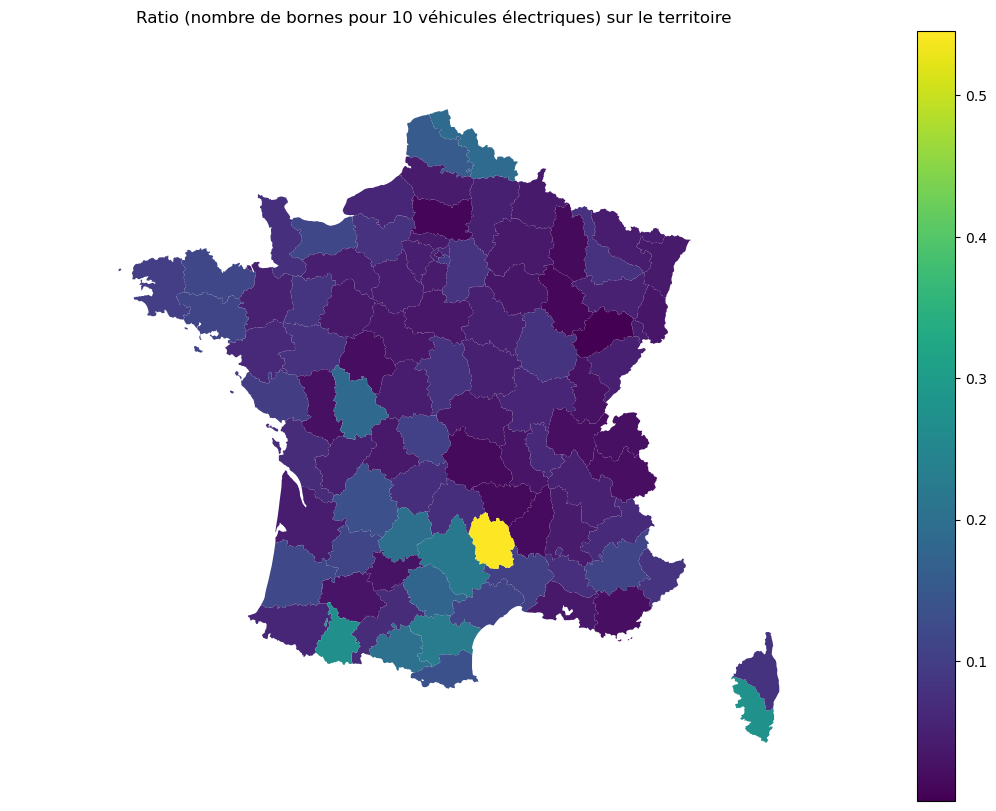

In [40]:
ev_map = geoplot.choropleth(data, hue = "ratio_ev/bornes", legend= True, projection=gcrs.AlbersEqualArea(), figsize=(15, 10), legend_kwargs={'spacing' : 'proportional'})
plt.title("Ratio (nombre de bornes pour 10 véhicules électriques) sur le territoire")
plt.show()

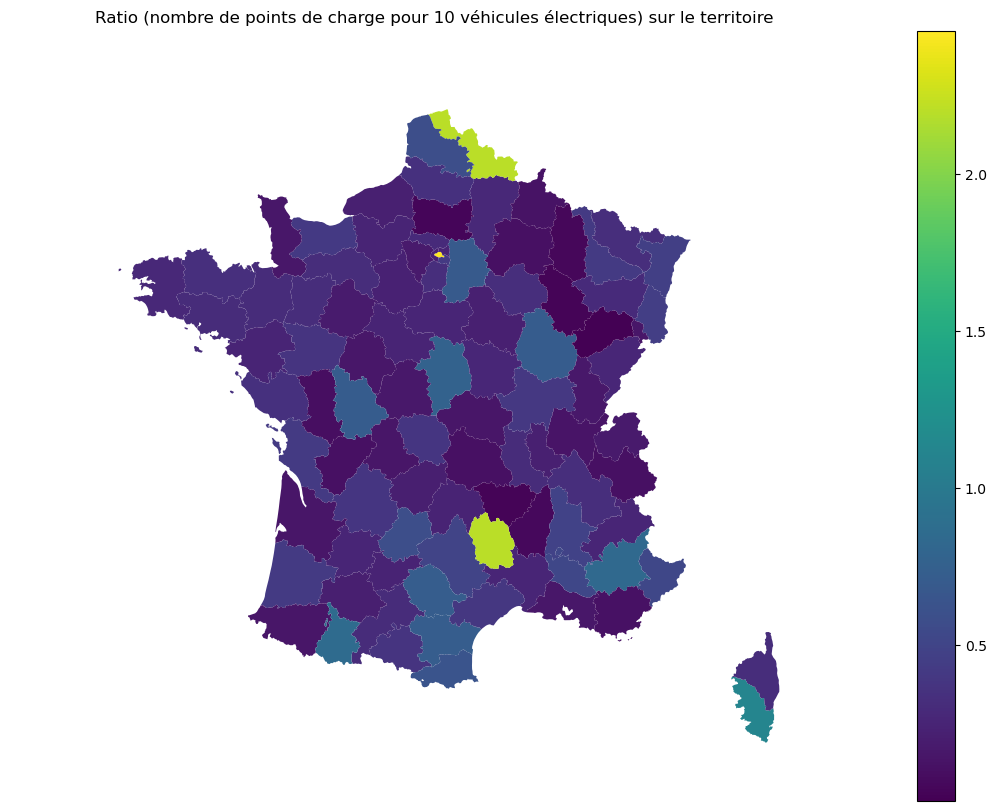

In [41]:
ev_map = geoplot.choropleth(data, hue = "ratio_ev/pdc", legend= True, projection=gcrs.AlbersEqualArea(), figsize=(15, 10), legend_kwargs={'spacing' : 'proportional'})
plt.title("Ratio (nombre de points de charge pour 10 véhicules électriques) sur le territoire")
plt.show()